In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# Install the vaex library

# pip install --pre vaex
# conda install -c conda-forge vaex

import vaex

In [4]:
from pygadget import Simulation, Subfind

In [5]:
# read snap and subfind

from pygadget import Simulation, Subfind

basedir = '/media/data1/ptissera/Halo_C09_c/'
basename = 'snap_C09_200_SN_{snapNum:d}'

snapNum = 100

snap = Simulation(basedir + basename.format(snapNum=snapNum))
subs = Subfind(basedir, snapNum, snap=snap)

In [6]:
# read positions blocks

gas_pos = snap.read_block('pos', 'gas')
halo_pos = snap.read_block('pos', 'halo')
stars_pos = snap.read_block('pos', 'stars')

In [7]:
# plot options

colors = [plt.cm.Greens_r, plt.cm.Reds_r, plt.cm.Blues_r]
plots = [halo_pos, gas_pos, stars_pos]
names = ['DM', 'gas', 'stars']
shape = 512

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


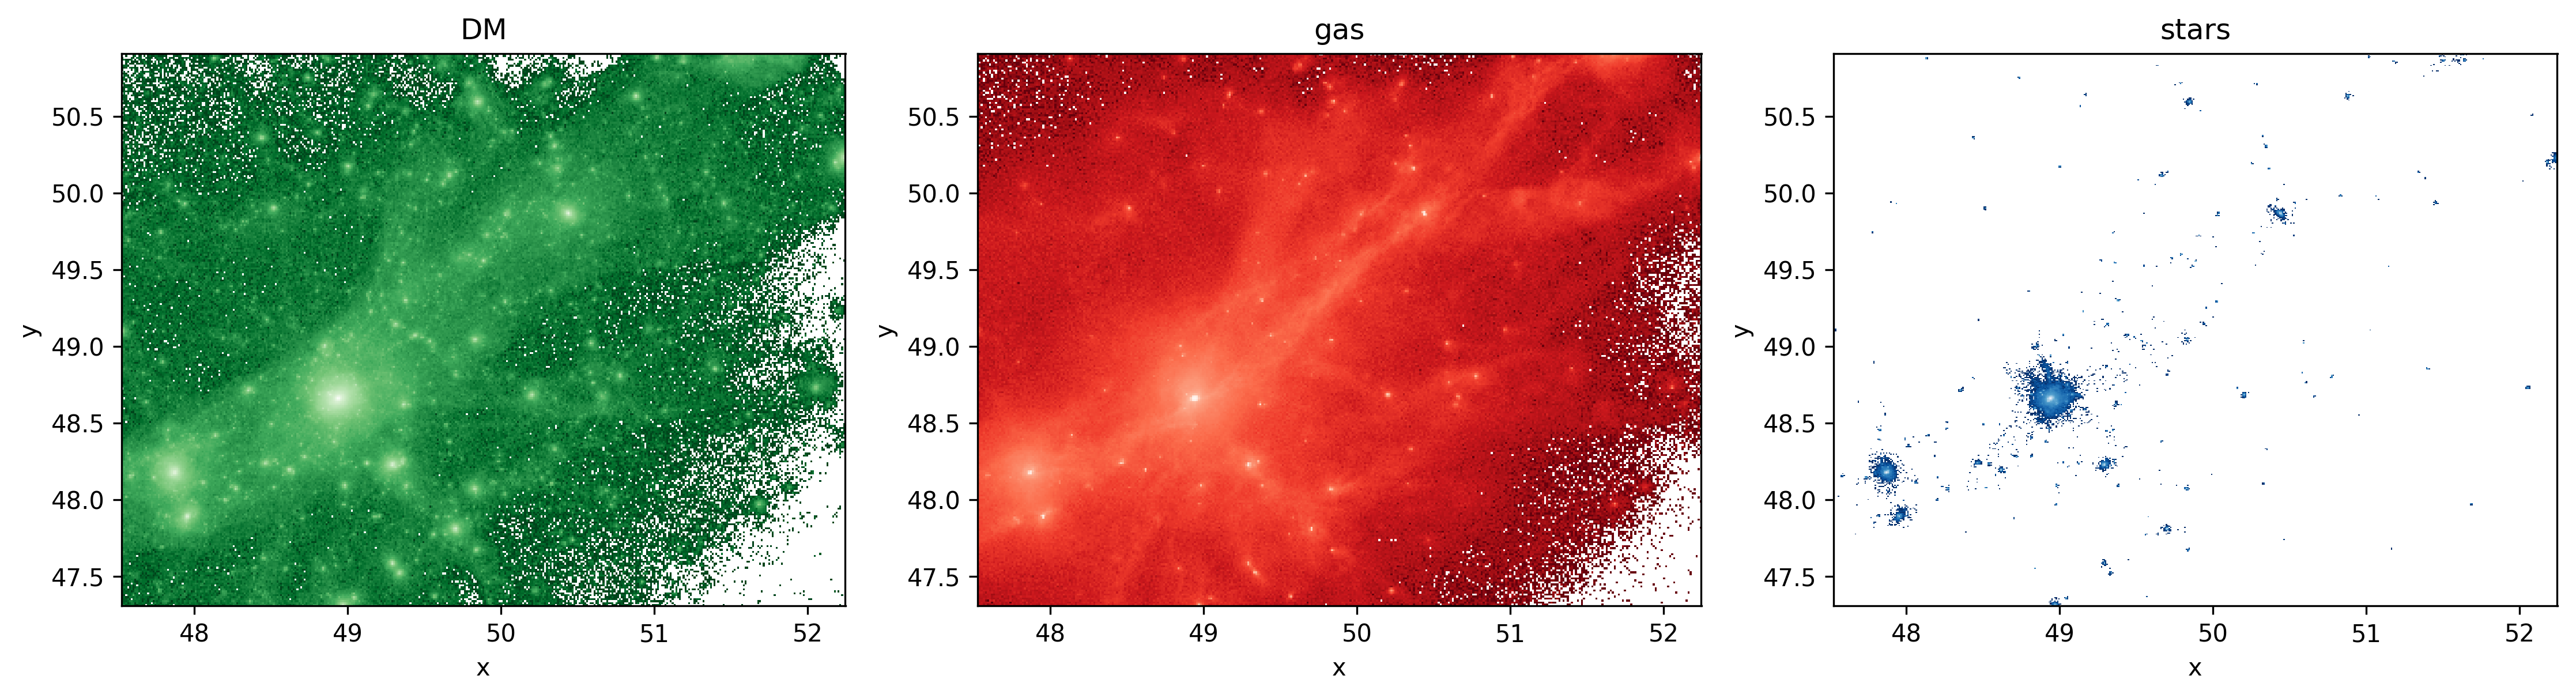

In [8]:
plt.figure(figsize=(15, 5), dpi=300)

axs = []
for i, p in enumerate(plots):
    
    if i==0:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i))
    else:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i), sharex=axs[0], sharey=axs[0])
    
    axs.append(ax)
    
    ds = vaex.from_pandas(p)
    ds.plot('x', 'y', f='log10', colormap=colors[i], colorbar=False, shape=shape)
    #ax.scatter(p.x, p.y, s=marker_size, c=colors[i])
    ax.set_aspect('equal')
    ax.set_title(names[i])
    
plt.tight_layout()